In [21]:
import time
import matplotlib.pyplot as plt
import numpy as np

from qarray import (DotArray, GateVoltageComposer, dot_occupation_changes)

In [22]:
# setting up the constant capacitance model_threshold_1
model = DotArray(
    Cdd=[
    [0., 0.3, 0.05, 0.01],
    [0.3, 0., 0.3, 0.05],
    [0.05, 0.3, 0., 0.3],
    [0.01, 0.05, 0.3, 0]
],
    Cgd=[
    [1., 0.2, 0.05, 0.01],
    [0.2, 1., 0.2, 0.05],
    [0.05, 0.2, 1., 0.2],
    [0.01, 0.05, 0.2, 1]
    ],
    core='rust',
    T=0.0
)

voltage_composer = GateVoltageComposer(n_gate=model.n_gate)


In [23]:
# using the dot voltage composer to create the dot voltage array for the 2d sweep
vg = voltage_composer.do2d(
    x_gate=0, x_min = -10, x_max = 10, x_res = 400,
    y_gate=3, y_min = -10, y_max = 10, y_res = 400
)

Elapsed time: 0.36 s or one pixel very 1.14 us


Text(0, 0.5, 'Vg1 (V)')

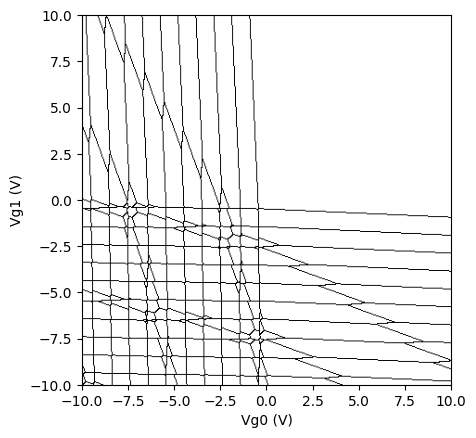

In [24]:
# calculating the dot occupation changes for the 2d sweep for an open double dot 
t0 = time.time()
n = model.ground_state_open(vg)  # computing the ground state by calling the function
t1 = time.time()
print(f'Elapsed time: {t1 - t0:.2f} s or one pixel every { 1e6 * (t1 - t0) / (vg.size // 2):.2f} us')

z = dot_occupation_changes(n)  # computing when the dot occupation changes

plt.imshow(z, extent=(vg[..., 0].min(), vg[..., 0].max(), vg[..., 3].min(), vg[..., 3].max()), origin='lower', cmap='binary')
plt.xlabel('Vg0 (V)')
plt.ylabel('Vg3 (V)')

Elapsed time: 0.46 s or one pixel very 1.45 us


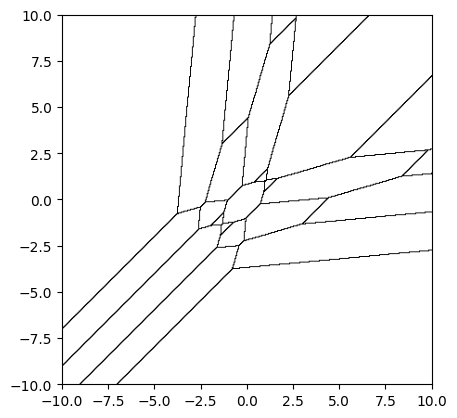

In [25]:
# calculating the dot occupation changes for the 2d sweep for an closed double dot containing 2 holes 
t0 = time.time()
n = model.ground_state_closed(vg, n_charges=4)  # computing the ground state by calling the function
t1 = time.time()
print(f'Elapsed time: {t1 - t0:.2f} s or one pixel every { 1e6 * (t1 - t0) / (vg.size // 2) :.2f} us')

z = dot_occupation_changes(n)  # computing when the dot occupation changes

plt.imshow(z, extent=(vg[..., 0].min(), vg[..., 0].max(), vg[..., 3].min(), vg[..., 3].max()), origin='lower', cmap='binary')
plt.xlabel('Vg0 (V)')
plt.ylabel('Vg3 (V)')